We summarize the construction of deep learning models in Keras as follows:

1. **Define model**. Create a sequence and add layers.
2. **Compile model**. Specify loss functions and optimizers.
3. **Fit model**. Execute the model using data.
4. **Make predictions**. Use the model to generate predictions on new data.

In [1]:
# import libraries
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras import backend as K
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# split data into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


It appears that there are 60000 images in train data, and the images are 28 pixels x 28 pixels each. We can confirm by plotting first sample:

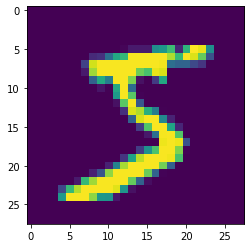

In [3]:
plt.imshow(x_train[0])

**Process data**

We want to transform our dataset from having shape ```(n, width, height)``` to ```(n, width, height, depth)```.

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

To confirm, we can print X_train's dimensions again:

In [5]:
print (x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


The preprocessing step for the input data is to convert our data type to float32 and normalize our data values to the range [0, 1].

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Next, let's take a look at the shape of our class label data:

In [7]:
print (y_train.shape)

(60000,)


We should have 10 different classes, one for each digit, but it looks like we only have a 1-dimensional array. 

In [8]:
# convert class vectors to binary class matrices
num_classes=10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

**Define Model**

In [9]:
batch_size = 128
epochs = 5
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Dropout is a method for regularizing our model in order to prevent overfitting.

MaxPooling2D is a way to reduce the number of parameters in our model by sliding a 2x2 pooling filter across the previous layer and taking the max of the 4 values in the 2x2 filter.

For Dense layers, the first parameter is the output size of the layer. Keras automatically handles the connections between layers.

The weights from the Convolution layers must be flattened (made 1-dimensional) before passing them to the fully connected Dense layer.

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2359552   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

**Compile Model**

In [11]:
import keras
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

When we compile the model, we declare the loss function and the optimizer.

**Fit data to Model**

In [12]:
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,verbose=1,
                 validation_data=(x_test, y_test))
print("The model has successfully trained")
# saving model
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/5
469/469 [==============================] - 213s 321ms/step - loss: 0.3872 - accuracy: 0.8798 - val_loss: 0.0501 - val_accuracy: 0.9839
Epoch 2/5
469/469 [==============================] - 148s 316ms/step - loss: 0.0656 - accuracy: 0.9794 - val_loss: 0.0403 - val_accuracy: 0.9871
Epoch 3/5
469/469 [==============================] - 148s 315ms/step - loss: 0.0486 - accuracy: 0.9843 - val_loss: 0.0303 - val_accuracy: 0.9899
Epoch 4/5
469/469 [==============================] - 152s 324ms/step - loss: 0.0360 - accuracy: 0.9891 - val_loss: 0.0260 - val_accuracy: 0.9908
Epoch 5/5
469/469 [==============================] - 151s 322ms/step - loss: 0.0293 - accuracy: 0.9904 - val_loss: 0.0271 - val_accuracy: 0.9914
The model has successfully trained
Saving the model as mnist.h5


**Evaluate Model**

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02711905539035797
Test accuracy: 0.9914000034332275


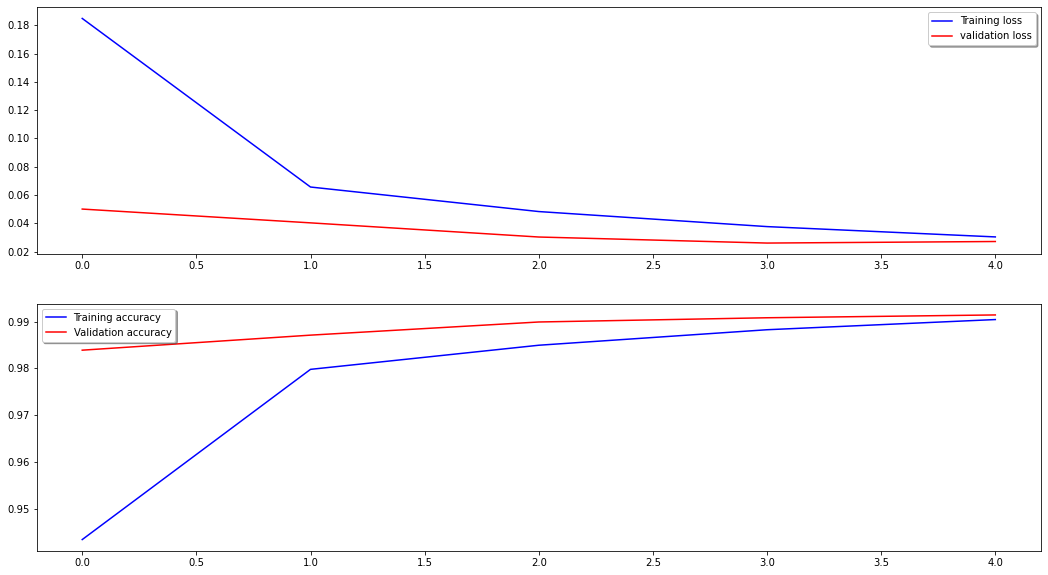

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

**Make Preictions**

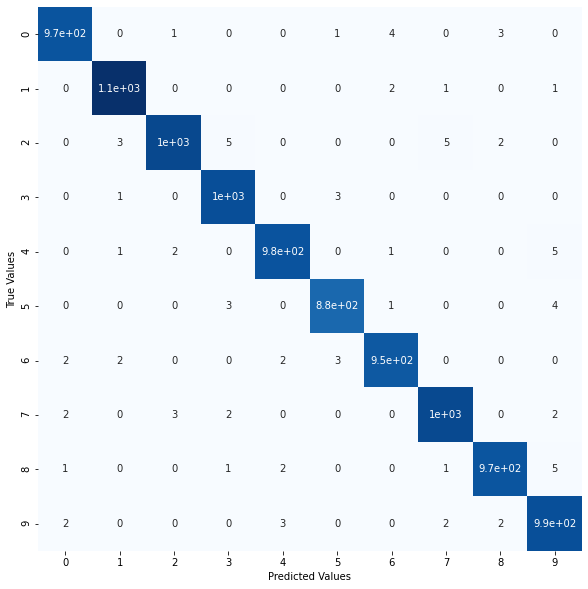

In [15]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(x_test) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

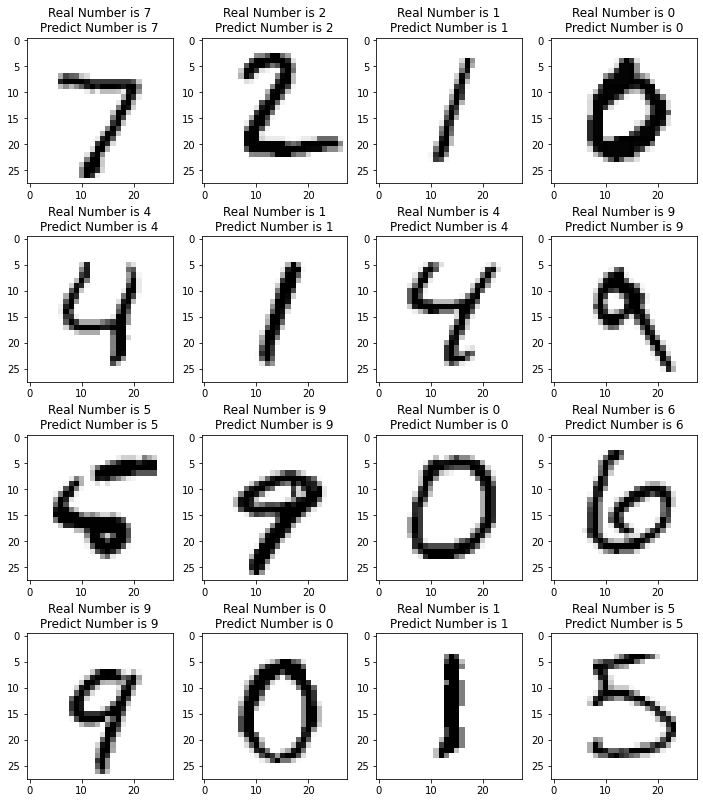

In [16]:
y_pred = model.predict(x_test)
X_test__ = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");